Do the following on titanic dataset.

1. Load the dataset into python environment

2. Make ‘PassengerId’ as the index column

3. Check the basic details of the dataset

4. Fill in all the missing values present in all the columns in the dataset

5. Check and handle outliers in at least 3 columns in the dataset

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

we have 891 rows and 12 columns

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 2. Make ‘PassengerId’ as the index column

In [7]:
df.set_index('PassengerId',inplace=True)

In [8]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
# we have setted the index column as passenger id

# 3. Check the basic details of the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [13]:
#here we can see the unique values poresent in each features

<AxesSubplot:>

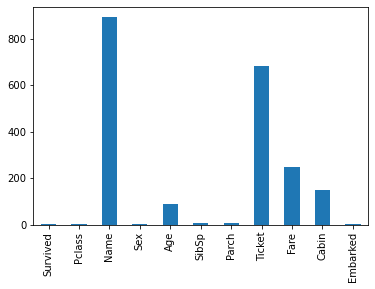

In [14]:
df.nunique().plot(kind='bar')

features name showing the different unique values as much as the diamension of the row and tickets also having the same behaviour loke more unique values

In [15]:
dup=df.duplicated(['Ticket'])

In [16]:
dup.sum()

210

In [17]:
#There is almost 680 unique tickets and 210 duplicates

In [18]:
df.drop('Ticket',axis=1,inplace=True)

In [19]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

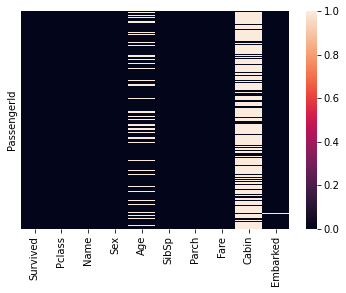

In [20]:
sns.heatmap(df.isnull(),yticklabels=False)

In [21]:
#both age and cabin have highest null values.

In [22]:
df.isna().sum()*100/len(df)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [23]:
#cabin contains 77% of null values and age have 20% of null values

In [24]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [25]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [26]:
num_features=[i for i in df.columns if df[i].dtypes!='O']

In [27]:
num_features

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [28]:
cat_features=[i for i in df.columns if df[i].dtypes=='O']

In [29]:
cat_features

['Name', 'Sex', 'Cabin', 'Embarked']

In [32]:
freqgraph=df.select_dtypes(include=['float64','int64'])

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

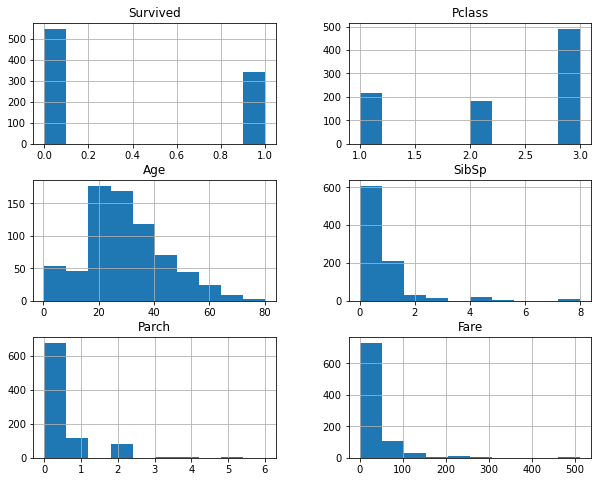

In [33]:
freqgraph.hist(figsize=(10,8))

these graphs telling about the numerical values of the data. Most of the people not survived, number of survived people are less.number of 3rd class passengers are high,large number of people lies between the age of 20 and 40. almost 90% people have siblings 0 or 1, more than one siblings less in this data. this same for the behaviour of children data too.

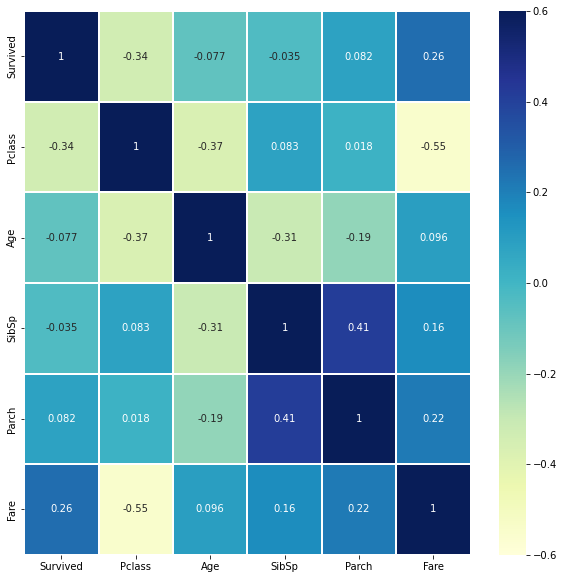

In [34]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,vmin=-0.6,vmax=0.6,annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

we can see the relation between the datasets it is noted that SibSp and Parch are having higher correlation compared to the other columns

we can also see some relationship between some categorical variables and numerical variables from this correlation heatmap, lets analyse it

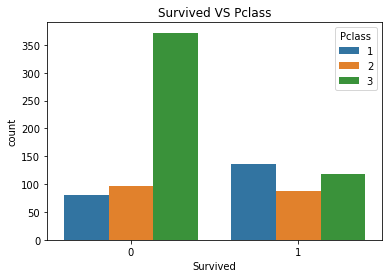

In [35]:
sns.countplot(data=df,x='Survived',hue='Pclass')
plt.title('Survived VS Pclass')
plt.show()

The count plot shows that there were a lot more passengers in the 3rd class than any other class, however 3rd class were far less likely to survive than passengers in 1st and 2nd class.

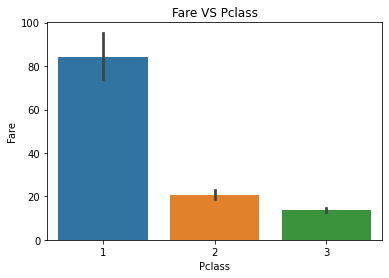

In [36]:
sns.barplot(data=df,y='Fare',x='Pclass')
plt.title('Fare VS Pclass')
plt.show()

Passengers in higher classes did pay more for tickets than passenger in lower class

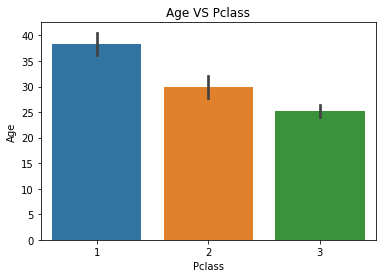

In [37]:
sns.barplot(data=df,x='Pclass',y='Age')
plt.title('Age VS Pclass')
plt.show()

3rd class contained younger age grouped passengers

# 4. Fill in all the missing values present in all the columns in the dataset

In [38]:
#it is noted that there are missing values present in Age, cabin, Embarked columns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

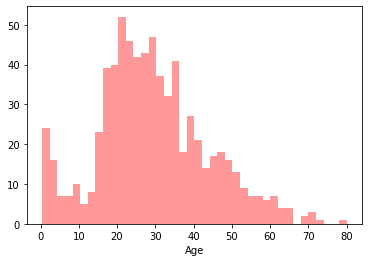

In [39]:
sns.distplot(df['Age'].dropna(),kde=False,color='red',bins=40)

from the histogram we can see that data is Right Skewed.

we saw in "Age VS Pclss" graph , there is different age grouped passengers based on pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

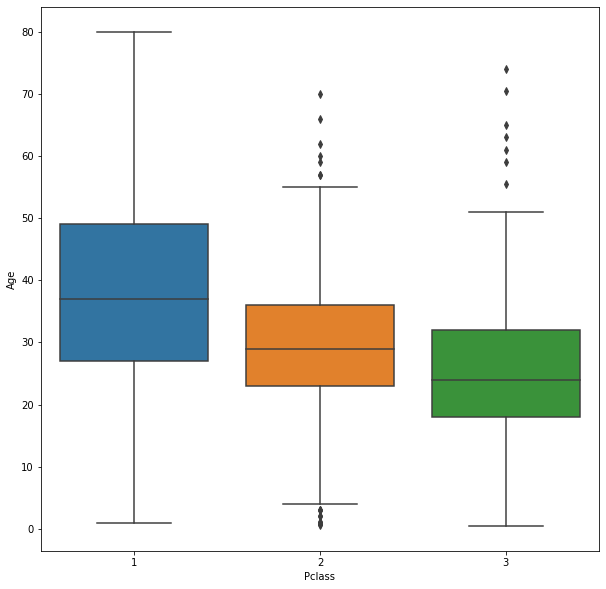

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Pclass',y='Age')

we can see that wealthier passengers in higher class tend to be older. so we can impute average age based on pclass

In [41]:
frames1=[]
for i in range (0,4):
    p_class=df[df['Pclass'] == i]
    p_class=pd.DataFrame(p_class)
    p_age=p_class.Age.mean()
    
    data= p_class.Age.fillna(p_age)
    p_class.Age=data
    frames1.append(p_class)
    frames1

frames1 = np.array(frames1, dtype="object")

fr1=pd.DataFrame(frames1[1])  
fr2=pd.DataFrame(frames1[2]) 
fr3=pd.DataFrame(frames1[3]) 

fr4=[fr1,fr2,fr3]
result=pd.concat(fr4)
result

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00000,0,0,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.00000,0,0,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.00000,0,0,10.5167,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00000,0,5,29.1250,NaN,Q


In [42]:
data=result

In [43]:
#since the Cabin column is having more than 55% missing values we will drop the column

In [44]:
data.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

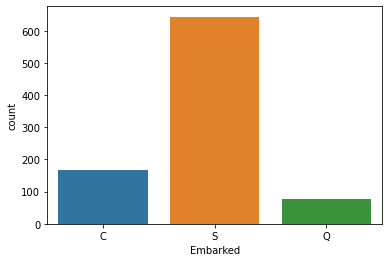

In [45]:
plt.figure()
sns.countplot(data=data,x="Embarked")

Most passengers in the Titanic embarked from port S.

In [46]:
#since Embarked is a Categorical value we will fill the missing values with mode.

In [52]:
data.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [53]:
data['Embarked']=data['Embarked'].fillna('S')

<AxesSubplot:ylabel='PassengerId'>

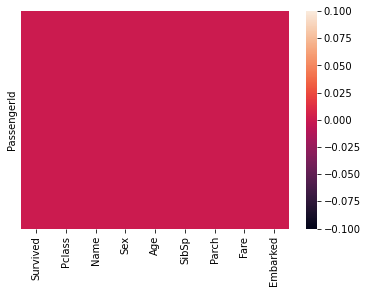

In [54]:
sns.heatmap(result.isnull(),yticklabels=False)

we successfully handled all missing values

# 5. Check and handle outliers in at least 3 columns in the dataset

In [55]:
num_v=[features for features in data.columns if df[features].dtypes!="O"]

<AxesSubplot:>

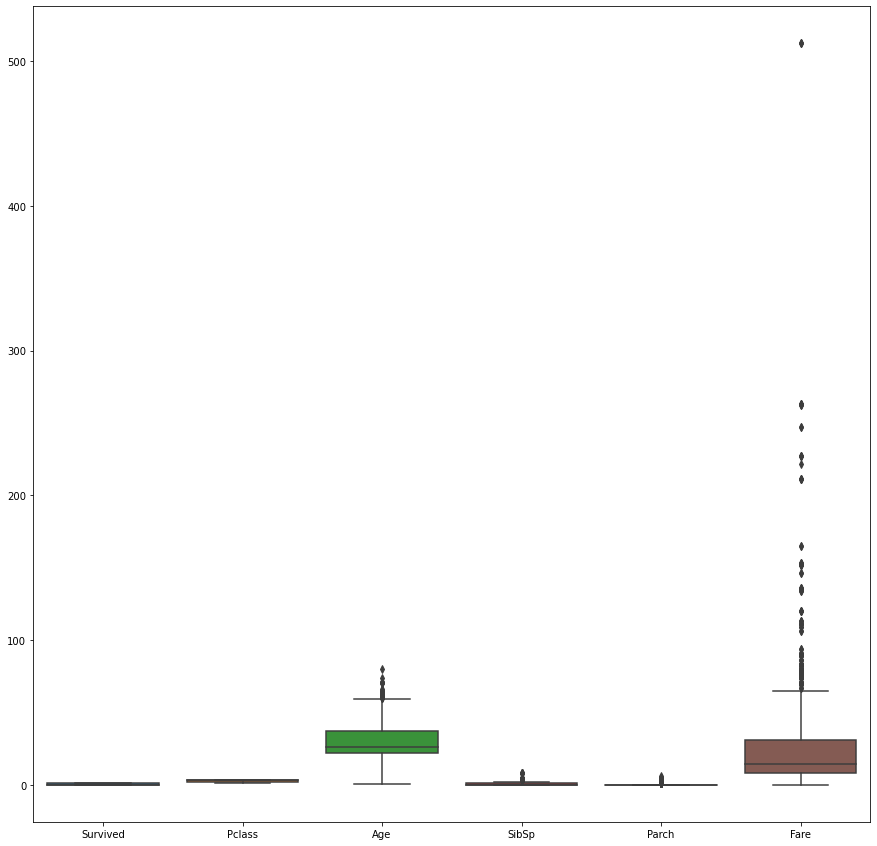

In [56]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data[num_v])

From this graph we can see that Age,SibSp,parch and Fare having some outliers

In [57]:
#lets check the age column

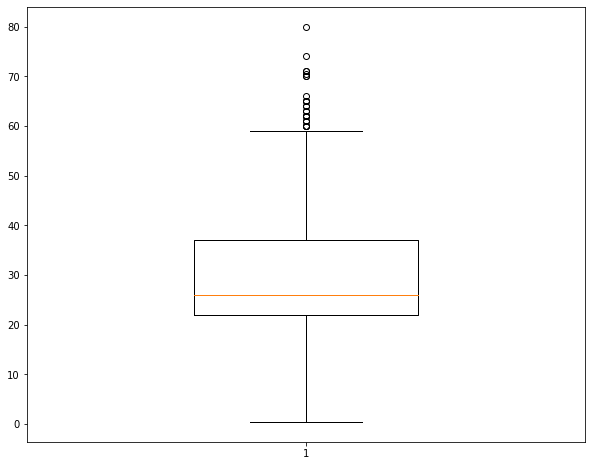

In [58]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Age'],widths=0.4)
plt.show()

In [59]:
data.Age.max()

80.0

since the age does not cross 80 and dosen't have any negative values and also considering filling the missing values with the mean depending upon Pclass. we analyse that wealthier pclass1 persons tend to be older , the outliers seems to be relevant and will not be removing any outliers.


<Figure size 432x288 with 0 Axes>

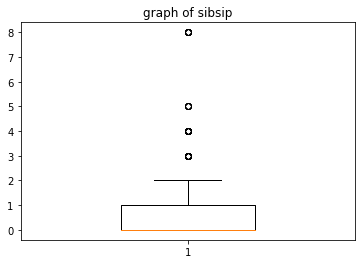

<Figure size 432x288 with 0 Axes>

In [60]:
plt.figure()
plt.boxplot(data['SibSp'],widths=0.4)
plt.title('graph of sibsip')
plt.figure()

In [61]:
#there are some outliers in the graph

In [62]:
Q1=np.percentile(data['SibSp'],25,interpolation="midpoint")
Q2=np.percentile(data['SibSp'],50,interpolation="midpoint")
Q3=np.percentile(data['SibSp'],75,interpolation="midpoint")

In [63]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [64]:
print(low_lim)
print(up_lim)

-1.5
2.5


In [65]:
outlier=[]
for x in data['SibSp']:
    if((x>up_lim)|(x<low_lim)):
        outlier.append(x)

In [66]:
outlier

[3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [67]:
indx=data['SibSp']>up_lim
dro_r=data.loc[indx].index

In [68]:
data.drop(dro_r,inplace=True)

Text(0.5, 1.0, 'graph of sibsip')

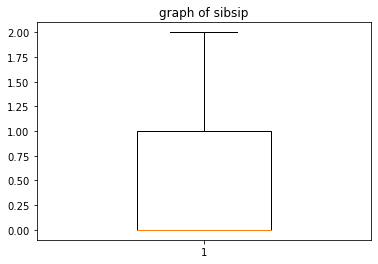

In [69]:
plt.figure()
plt.boxplot(data['SibSp'],widths=0.4)
plt.title('graph of sibsip')

In [70]:
#the outliers are removed from the column SibSp

In [71]:
#Checking outlier present in the column parch

Text(0.5, 1.0, 'graph of Parch')

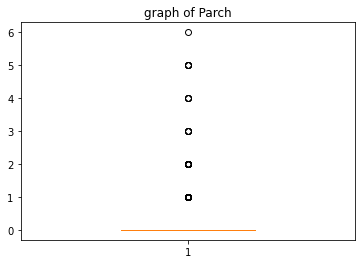

In [72]:
plt.figure()
plt.boxplot(data['Parch'],widths=0.4)
plt.title('graph of Parch')

In [73]:
Q1=np.percentile(data['Parch'],30,interpolation='midpoint')
Q2=np.percentile(data['Parch'],60,interpolation='midpoint')
Q3=np.percentile(data['Parch'],90,interpolation='midpoint')
IQR=Q3-Q1
lw=Q1-1.5*IQR
up=Q3+1.5*IQR
print(lw,up)

-1.5 2.5


In [74]:
outlier=[]
for x in data['Parch']:
    if((x>up)or(x<lw)):
        outlier.append(x)

In [75]:
outlier

[4, 3, 3, 5, 5, 3, 4, 4, 4, 5, 5, 6, 3, 3, 5]

In [76]:
indx=data['Parch']>up
dt=data.loc[indx].index

In [77]:
dt

Int64Index([439, 438, 775, 14, 26, 87, 168, 361, 568, 611, 639, 679, 737, 859,
            886],
           dtype='int64', name='PassengerId')

In [78]:
data.drop(dt,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x211f2d4fa90>,
 'caps': [<matplotlib.lines.Line2D at 0x211f2d5e070>,
 'boxes': [<matplotlib.lines.Line2D at 0x211f2d4f7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x211f2d5e610>],
 'fliers': [<matplotlib.lines.Line2D at 0x211f2d5e8e0>],
 'means': []}

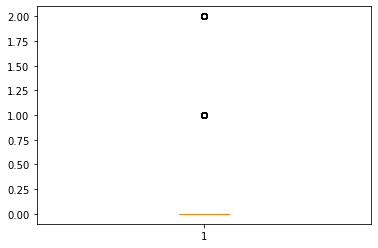

In [79]:
plt.boxplot(data['Parch'])

In [80]:
#we remove outliers,checking the outliers present in the column fare.

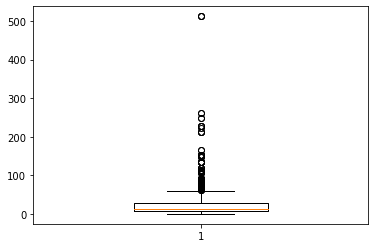

In [81]:
plt.figure()
plt.boxplot(data['Fare'],widths=0.4)
plt.show()

In [82]:
Q1=np.percentile(data['Fare'],30,interpolation='midpoint')
Q2=np.percentile(data['Fare'],60,interpolation='midpoint')
Q3=np.percentile(data['Fare'],90,interpolation='midpoint')
IQR=Q3-Q1
lw=Q1-1.5*IQR
up=Q3+1.5*IQR
print(lw,up)

-97.04375 183.20625


In [84]:
outlier=[]
for x in data['Fare']:
    if((x>up)or(x<lw)):
        outlier.append(x)

In [85]:
outlier

[247.5208,
 512.3292,
 247.5208,
 262.375,
 211.5,
 227.525,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

In [86]:
indx=data['Fare']>up
dts=data.loc[indx].index

In [87]:
dts

Int64Index([119, 259, 300, 312, 378, 381, 528, 558, 680, 690, 701, 717, 731,
            738, 743, 780],
           dtype='int64', name='PassengerId')

In [88]:
data.drop(dts,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x211f2f46fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x211f2f565b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x211f2f3abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x211f2f56b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x211f2f56e20>],
 'means': []}

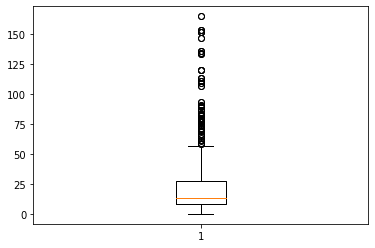

In [89]:
plt.boxplot(data['Fare'])

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [90]:
#we need to convert categorical data in to numeric form by using onehot encoding

In [91]:
data.drop('Name',axis=1,inplace=True)

In [92]:
data=pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)

In [93]:
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
2,1,1,38.0,1,0,71.2833,0,0,0
4,1,1,35.0,1,0,53.1000,0,0,1


In [94]:
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [95]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,2.296069,29.960611,0.304668,0.239558,25.900741,0.665848,0.088452,0.721130
std,0.831164,12.844561,0.523074,0.550395,29.996558,0.471983,0.284126,0.448719
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000,13.000000,1.000000,0.000000,1.000000
75%,3.000000,37.000000,1.000000,0.000000,27.540600,1.000000,0.000000,1.000000
max,3.000000,80.000000,2.000000,2.000000,164.866700,1.000000,1.000000,1.000000


In [96]:
from sklearn import preprocessing

In [97]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [98]:
X=min_max.fit_transform(X)
X=pd.DataFrame(X)

In [99]:
X.describe()

,0,1,2,3,4,5,6,7
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,0.648034,0.371206,0.152334,0.119779,0.157101,0.665848,0.088452,0.721130
std,0.415582,0.161404,0.261537,0.275198,0.181944,0.471983,0.284126,0.448719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.283740,0.000000,0.000000,0.047892,0.000000,0.000000,0.000000
50%,1.000000,0.334004,0.000000,0.000000,0.078852,1.000000,0.000000,1.000000
75%,1.000000,0.459663,0.500000,0.000000,0.167048,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
